<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# ***Machine Learning Foundation***

## ***Dimensional Reduction***

$ \ $

Here are more mathematical details about dimensionality reduction in machine learning:

$(1)$ $\color{lightblue}{\text{Feature Selection.}}$

Feature selection aims to identify a subset of the original features that are most relevant to the target variable or capture the most informative aspects of the data. Different methods for feature selection include:

- $\color{lightgreen}{\text{Filter Methods:}}$ These methods evaluate the statistical properties of each feature independently of the machine learning model. They include techniques like correlation analysis, information gain, chi-square test, and mutual information. The features are ranked or assigned scores based on their relevance, and a threshold is set to select the top-ranked features.

- $\color{lightgreen}{\text{Wrapper Methods:}}$ Wrapper methods assess the performance of a machine learning model using subsets of features. They involve iterative feature selection, where different subsets of features are evaluated by training and testing a model. The search can be done exhaustively or using heuristics like forward selection or backward elimination.

- $\color{lightgreen}{\text{Embedded Methods:}}$ Embedded methods perform feature selection as part of the model training process. These methods combine feature selection with the model's learning algorithm. For example, regularization techniques like L1 regularization (Lasso) can drive some feature weights to zero, effectively performing feature selection.

$(2)$  $\color{lightblue}{\text{Feature Extraction.}}$

Feature extraction transforms the original high-dimensional data into a lower-dimensional representation by creating new features. The transformed features aim to capture the most important information or patterns in the data. Two popular feature extraction methods are Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

- $\color{lightgreen}{\text{Principal Component Analysis (PCA):}}$ PCA is a linear dimensionality reduction technique that aims to find the directions (principal components) along which the data varies the most. These principal components are orthogonal to each other and sorted by the amount of variance they explain in the data. By projecting the data onto a subset of the principal components, a lower-dimensional representation is obtained. PCA achieves this by performing an eigendecomposition or singular value decomposition on the data covariance or correlation matrix.

- $\color{lightgreen}{\text{t-Distributed Stochastic Neighbor Embedding (t-SNE):}}$ t-SNE is a nonlinear dimensionality reduction technique that emphasizes preserving the local relationships between data points. It constructs a probability distribution over pairs of high-dimensional data points, attempting to retain the similarities between nearby points. In the low-dimensional space, it constructs a similar probability distribution. The algorithm minimizes the divergence between the two distributions using gradient descent, effectively mapping the high-dimensional data to a lower-dimensional representation.

Both PCA and t-SNE offer different strengths and are suitable for different scenarios. PCA captures global patterns and is useful for reducing the dimensionality while preserving the overall structure of the data. On the other hand, t-SNE excels in capturing local structures and is often used for visualization purposes to identify clusters and patterns that might not be evident in the original high-dimensional space.

In summary, feature selection methods focus on identifying the most relevant features, while feature extraction methods create new features that capture the essential information in the data. Both approaches aim to reduce the dimensionality of the data while preserving relevant information and improving computational efficiency and model performance.

$ \ $

-----

## ***Introduction***

$ \ $

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for clustering. This data file is called ***Wholesale_Customers_Data***. It contains the following features:

* Fresh: annual spending (m.u.) on fresh products

* Milk: annual spending (m.u.) on milk products

* Grocery: annual spending (m.u.) on grocery products

* Frozen: annual spending (m.u.) on frozen products

* Detergents_Paper: annual spending (m.u.) on detergents and paper products

* Delicatessen: annual spending (m.u.) on delicatessen products

* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)

* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).


$ \ $

-----

## ***Installing required libraries***

$ \ $


The following required modules are pre-installed in the Skills Network Labs environment.

In [1]:
import os, pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

----

## ***Example $(1)$.***

$ \ $

$(1)$ Import the data and check the data types.


In [3]:
# Definimos la URL desde donde se obtendrá el conjunto de datos.
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/Wholesale_Customers_Data.csv'

# Utilizamos la función 'read_csv' de pandas para cargar los datos desde la URL en el DataFrame 'data'.
# El argumento sep = ',' indica que los valores del conjunto de datos están separados por comas.
data = pd.read_csv(url, sep = ',')

# Mostramos las primeras filas del DataFrame 'data'.
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

$ \ $

$(2)$ Drop the channel and region columns as they won't be used since we focus on numeric columns for this example.

In [5]:
# Eliminamos las columnas 'Channel' y 'Region' del DataFrame 'data'.
# El argumento 'axis=1' indica que estamos eliminando columnas en lugar de filas.
data = data.drop(['Channel', 'Region'], axis = 1)

# Mostramos las primeras filas del DataFrame después de eliminar las columnas.
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

$ \ $

$(3)$ Convert the remaining columns to floats if necessary.

In [6]:
# Iteramos sobre cada columna del DataFrame 'data'.
for col in data.columns:
    # Convertimos los valores de cada columna a tipo de dato 'float'.
    data[col] = data[col].astype(np.float)

In [7]:
# Mostramos los tipos de datos resultantes de cada columna en el DataFrame 'data'.
print(data.dtypes)

Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object


$ \ $

$(4)$ Copy this version of the data (using the `copy` method) to a variable to preserve it. We will be using it later.

In [8]:
# Creamos una copia del DataFrame 'data' y la almacenamos en 'data_orig'.
data_orig = data.copy()

$ \ $

$(5)$ Examine the correlation.

In [9]:
# Esto calcula la matriz de correlación utilizando la función corr() del DataFrame data. La matriz de correlación muestra la relación lineal entre las variables del DataFrame.
corr_mat = data.corr()

# Describimos el numero de renglones del array corr_mat
n = corr_mat.shape[0]

# Este bucle itera sobre el rango de filas de la matriz de correlación.
for x in range(n):

    # En cada iteración del bucle, se establece el valor en la posición (x, x) de la matriz de correlación en 0. Esto se hace para establecer los valores diagonales de la matriz en 0, ya que representan la correlación de una variable consigo misma.
    corr_mat.iloc[x, x] = 0.0

In [10]:
# mostramos la matriz de correlacion
corr_mat

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             0.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  0.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  0.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  0.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          0.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          0.000000

$ \ $

$(6)$ We get the categories with their respective most strongly correlated variable.

In [11]:
# Se calcula el valor absoluto máximo para cada columna del DataFrame 'corr_mat' y se obtiene la etiqueta correspondiente.
corr_mat.abs().idxmax()

Fresh                         Frozen
Milk                         Grocery
Grocery             Detergents_Paper
Frozen                    Delicassen
Detergents_Paper             Grocery
Delicassen                      Milk
dtype: object

$ \ $

$(7)$ Examine the skew values.

In [12]:
# Esto calcula el sesgo de cada columna en el DataFrame data utilizando la función skew(). Luego, los valores de sesgo se ordenan en orden descendente utilizando sort_values().
log_columns = data.skew().sort_values(ascending = False)

# La expresión log_columns > 0.75 devuelve una serie booleana que indica qué columnas cumplen con el criterio de tener un sesgo superior a 0.75.
mascara = (log_columns > 0.75)

# En esta línea, se seleccionan las columnas de log_columns que tienen un valor de sesgo mayor que 0.75. Luego, se utiliza loc[] para filtrar las columnas de log_columns que cumplen con el criterio y se asignan nuevamente a log_columns.
log_columns = log_columns.loc[mascara]

# mostramos el resultado en pantalla
log_columns

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

$ \ $

$(8)$ We apply the $log$ transform.

In [13]:
# Este bucle itera sobre los índices de las columnas seleccionadas en log_columns.
for col in log_columns.index:

    # En cada iteración del bucle, se aplica la función np.log1p() a la columna correspondiente en data. La función np.log1p(x)= ln(1+x) calcula el logaritmo natural más 1 de cada valor en la columna, lo que ayuda a manejar valores cercanos a cero o negativos.
    data[col] = np.log1p(data[col])

$ \ $

$(9)$ Scale the data again.


In [14]:
# Esto crea una instancia del objeto MinMaxScaler, que se utilizará para realizar la transformación de escala mínima-máxima.
mms = MinMaxScaler()

# Este bucle itera sobre las columnas del DataFrame data.
for col in data.columns:

    # En cada iteración del bucle, se selecciona la columna col del DataFrame data y se pasa como argumento a mms.fit_transform(). Esto ajusta y transforma los valores de la columna utilizando la escala mínima-máxima. Luego, el resultado de la transformación se asigna nuevamente a la columna col en data utilizando data[col].
    data[col] = mms.fit_transform(data[[col]])

    # El método squeeze() se utiliza para eliminar los ejes de longitud uno y obtener una serie unidimensional.
    data[col] = data[[col]].squeeze()

$ \ $

$(10)$ We visualize the relationship between the variables.

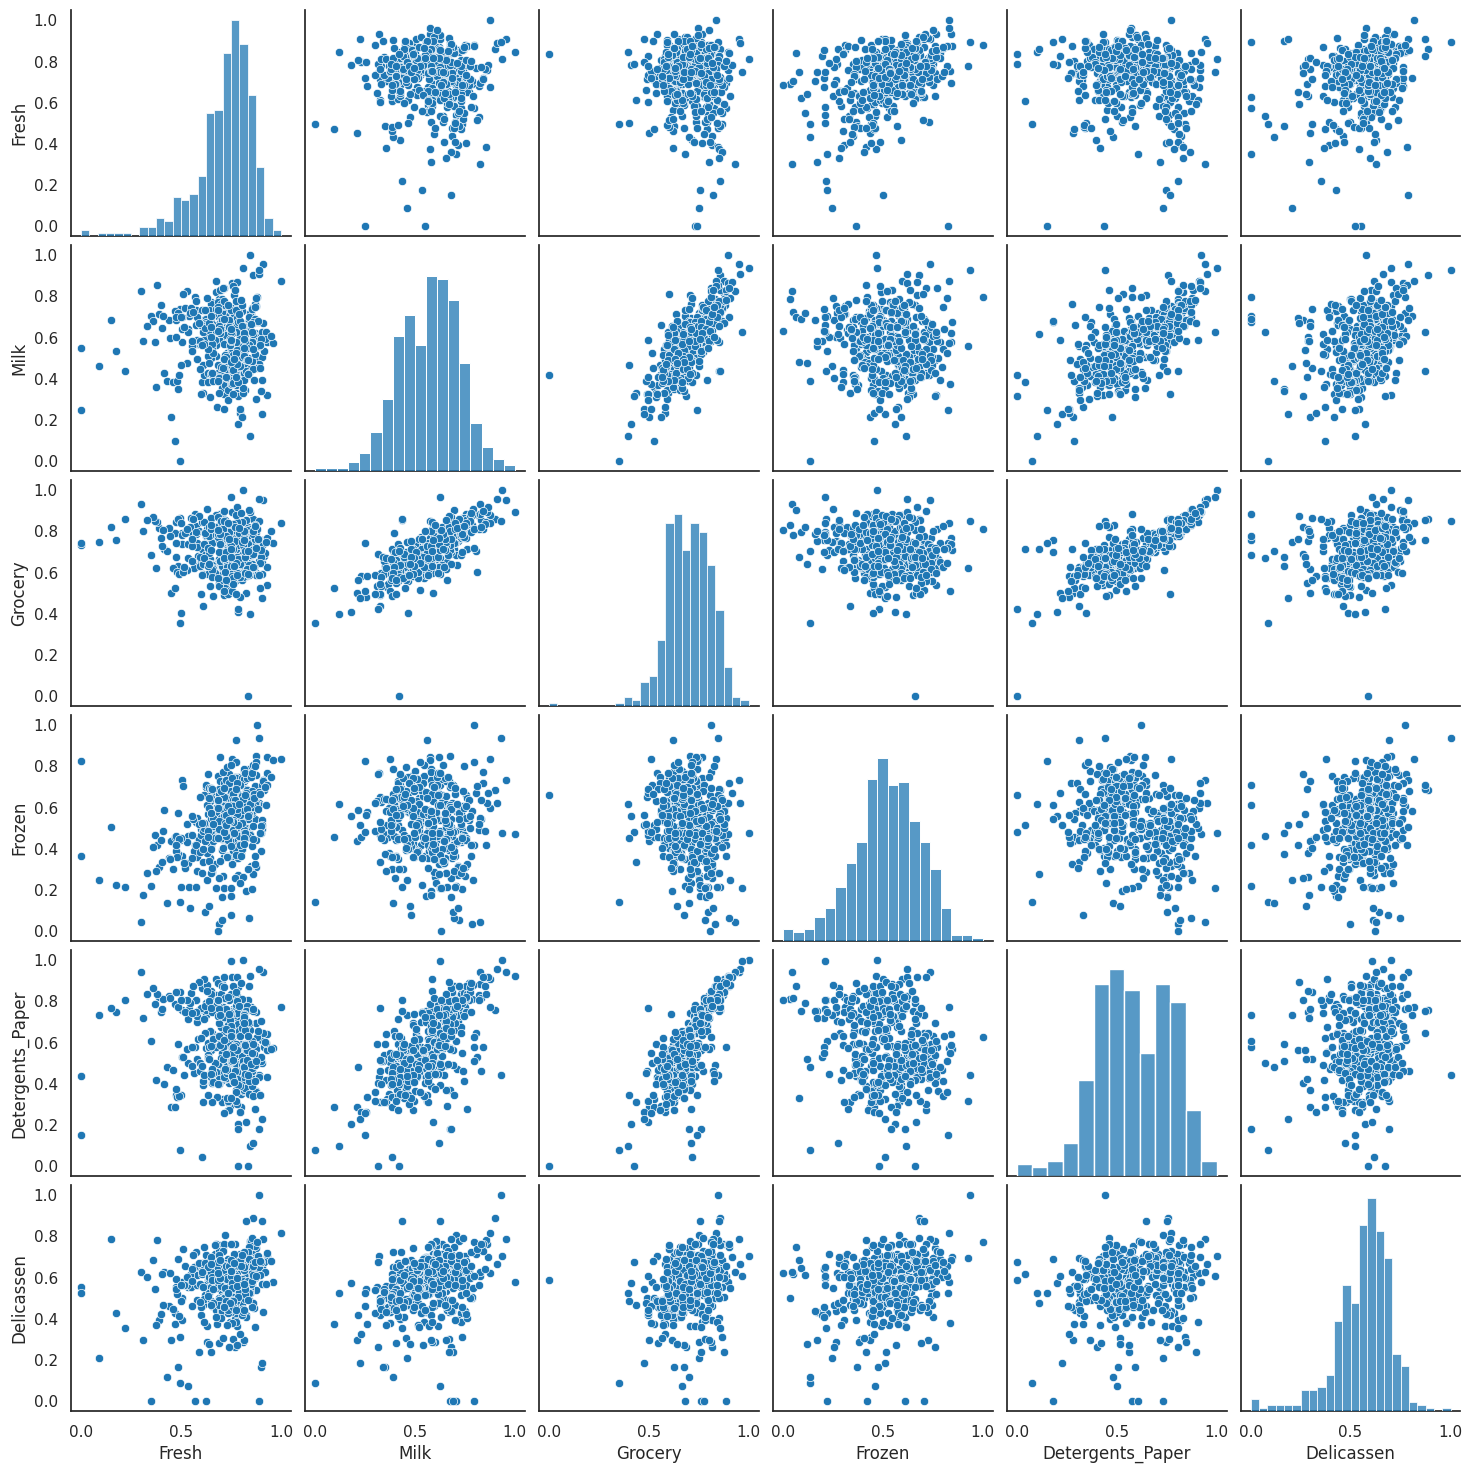

In [15]:
# Esto establece el contexto del gráfico en 'notebook', lo que ajusta los parámetros visuales para adaptarse a la visualización en un entorno de cuaderno Jupyter.
sns.set_context('notebook')

# Esto establece el estilo del gráfico en 'white', lo que configura el fondo del gráfico en blanco.
sns.set_style('white')

# Esto crea un gráfico de pares que muestra las relaciones entre todas las combinaciones posibles de variables en el DataFrame data. Cada punto en el gráfico representa una observación y se muestra la dispersión de los datos para cada combinación de variables. Además, en la diagonal principal se muestra un histograma para cada variable.
sns.pairplot(data);

$ \ $

$(11)$ Using Scikit-learn's [pipeline function](http://scikit-learn.org/stable/modules/pipeline.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01), recreate the data pre-processing scheme above (transformation and scaling) using a pipeline.

In [16]:
# Esto crea un objeto FunctionTransformer utilizando la función np.log1p de NumPy. La función np.log1p(x)=ln(1+x) calcula el logaritmo natural más 1 de cada valor en los datos.
log_transformer = FunctionTransformer(np.log1p)

# Aquí se crea una lista de estimadores en forma de pares (nombre, estimador). En este caso, se especifica que queremos aplicar primero la transformación logarítmica y luego la escala mínima-máxima.
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]

# Esto crea la canalización (pipeline) utilizando los estimadores especificados en la lista estimators. La canalización permite encadenar varios pasos de transformación y modelado en un orden específico.
pipeline = Pipeline(estimators)

# Aquí se aplica la canalización a los datos originales del DataFrame data_orig. Se realiza el ajuste (fit) y la transformación (transform) de los datos utilizando los estimadores en el orden especificado.
data_pipe = pipeline.fit_transform(data_orig)

$ \ $

$(12)$ The results are identical. Note that machine learning models and grid searches can also be added to the pipeline.

In [17]:
# Esta línea de código compara los valores de los arrays data_pipe y data elemento por elemento y devuelve True si todos los elementos son cercanos o iguales, dentro de una tolerancia dada. La función np.allclose() es útil para verificar si dos arrays son iguales o muy similares en contenido.
np.allclose(data_pipe, data)

True

$ \ $

$(13)$ Perform $PCA$ object with:

* `n_components` ranging from $1$ to $5$.

* Store the amount of explained variance for each number of dimensions.

* Store the feature importance for each number of dimensions.

In [18]:
#  Esto crea una lista vacía pca_list para almacenar los resultados del PCA para diferentes números de componentes.
pca_list = []

# Esto crea una lista vacía feature_weight_list para almacenar los pesos de las características de PCA para diferentes números de componentes.
feature_weight_list = []

# iteramos sobre los números de componentes de 1 a 5.
for n in range(1, 6):

    # Esto crea una instancia del objeto PCA con el número de componentes especificado.
    PCAmod = PCA(n_components = n)

    # Esto ajusta el modelo PCA utilizando los datos del DataFrame data.
    PCAmod.fit(data)

    # Esto crea una serie que contiene el número de componentes (n), el modelo PCA ajustado (PCAmod) y la suma de las razones de varianza explicada (explained_variance_ratio_) del modelo. La serie se almacena en serie.
    serie = pd.Series({'n': n, 'model' : PCAmod,'var': PCAmod.explained_variance_ratio_.sum()})

    # Esto agrega la serie a la lista pca_list.
    pca_list.append(serie)

    # Esto calcula la suma de los valores absolutos de los componentes del PCA a lo largo del eje 0, lo que representa los pesos de las características.
    abs_feature_values = np.abs(PCAmod.components_).sum(axis = 0)

    # Esto crea un diccionario que contiene el número de componentes (n), las características del DataFrame data y los valores normalizados de los pesos de las características.
    diccionario = {'n' : n, 'features': data.columns, 'values' : abs_feature_values/abs_feature_values.sum()}

    # Esto crea un DataFrame df a partir del diccionario.
    df = pd.DataFrame(diccionario)

    # Esto agrega el DataFrame df a la lista feature_weight_list.
    feature_weight_list.append(df)


In [19]:
# Esto concatena los elementos en la lista pca_list a lo largo del eje 1 (columnas) y transpone el resultado. Luego, se establece la columna 'n' como el índice del DataFrame resultante pca_df.
pca_df = pd.concat(pca_list, axis = 1).T.set_index('n')

# mostramos en pantalla el dataframe creado pca_df
pca_df

model       var
n                               
1  PCA(n_components=1)  0.448011
2  PCA(n_components=2)   0.72099
3  PCA(n_components=3)  0.827534
4  PCA(n_components=4)  0.923045
5  PCA(n_components=5)  0.979574

In [20]:
# Esta linea concatena los DataFrames en la lista feature_weight_list para combinar los resultados de los pesos de las características.
features_df = pd.concat(feature_weight_list)

# mostramos en pantallas los primeros 5 renglones
features_df.head()

n          features    values
0  1             Fresh  0.060620
1  1              Milk  0.246010
2  1           Grocery  0.190236
3  1            Frozen  0.095979
4  1  Detergents_Paper  0.335487

In [21]:
# Esta linea realiza una pivoteada en el DataFrame resultante, donde los valores en la columna 'features' se convierten en columnas en el DataFrame resultante. El índice se establece como 'n' y los valores se toman de la columna 'values'.
features_df = features_df.pivot(index = 'n', columns = 'features', values = 'values')

# mostramos en pantallas las primeras 5 lineas
features_df

features  Delicassen  Detergents_Paper     Fresh    Frozen   Grocery      Milk
n                                                                             
1           0.071668          0.335487  0.060620  0.095979  0.190236  0.246010
2           0.151237          0.177519  0.158168  0.222172  0.112032  0.178872
3           0.165518          0.145815  0.211434  0.268363  0.084903  0.123967
4           0.224259          0.149981  0.239527  0.214275  0.070971  0.100987
5           0.211840          0.182447  0.196382  0.178104  0.067338  0.163888

$ \ $

$(14)$ Create a plot of explained variances.

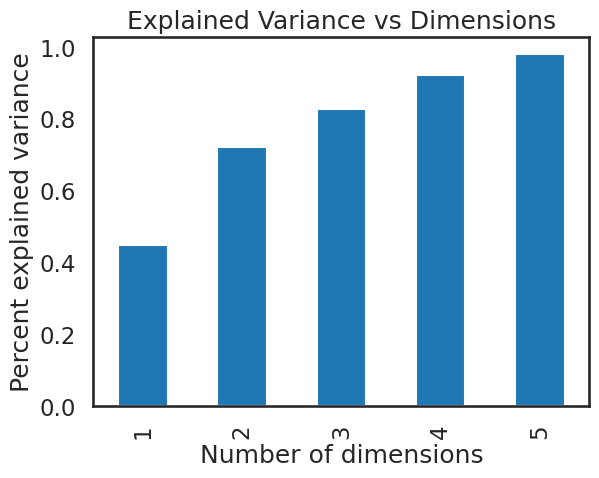

In [22]:
# Esta linea establece el contexto del gráfico en 'talk', lo que ajusta los parámetros visuales para adaptarse a una presentación o discusión más destacada.
sns.set_context('talk')

# Esta linea crea un gráfico de barras utilizando la columna 'var' del DataFrame pca_df. La columna 'var' contiene la varianza explicada para cada número de componentes en el PCA. El objeto ax se utiliza para manipular y personalizar el gráfico.
ax = pca_df['var'].plot(kind = 'bar')

# Esta linea establece las etiquetas de los ejes x e y, así como el título del gráfico.
ax.set(xlabel = 'Number of dimensions', ylabel = 'Percent explained variance', title = 'Explained Variance vs Dimensions');

$ \ $

$(15)$ We describe a plot of feature importances.

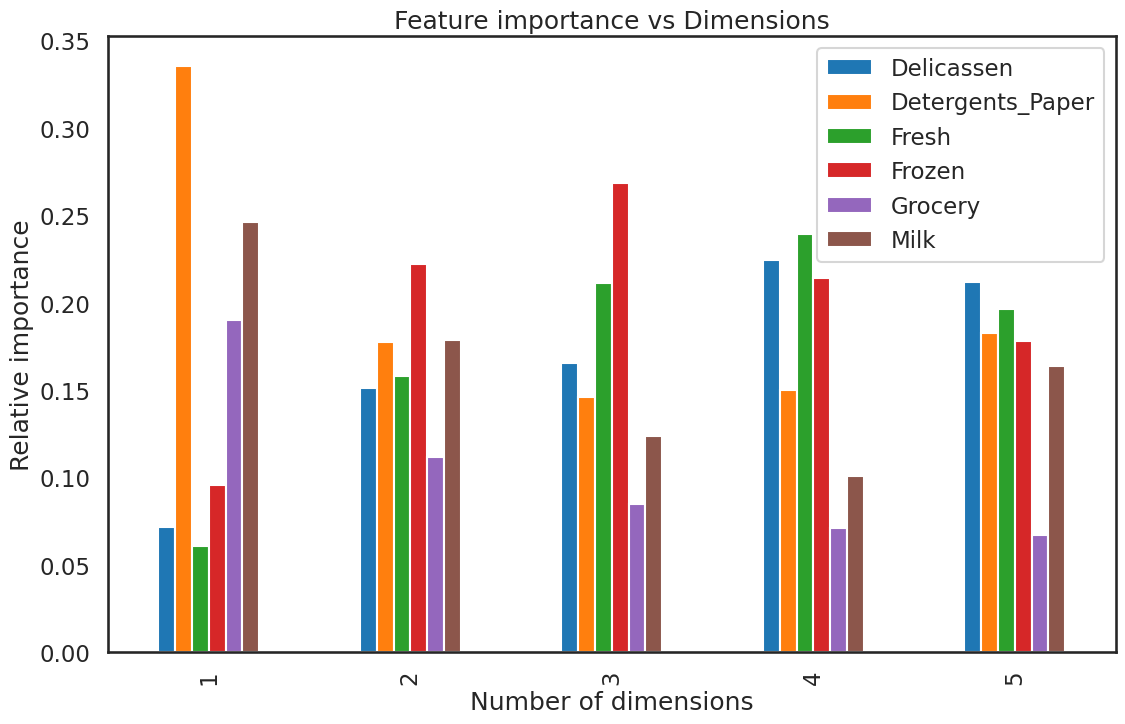

In [23]:
# Esto crea un gráfico de barras utilizando el DataFrame features_df. Cada barra representa la importancia relativa de una característica para cada número de dimensiones en el PCA. El parámetro figsize establece el tamaño de la figura.
ax = features_df.plot(kind = 'bar', figsize = (13, 8))

# Esto agrega una leyenda al gráfico para identificar las características representadas por las barras.
ax.legend(loc = 'upper right')

# Esto establece las etiquetas de los ejes x e y, así como el título del gráfico.
ax.set(xlabel = 'Number of dimensions', ylabel = 'Relative importance', title = 'Feature importance vs Dimensions');

$ \ $

-----

## ***Example $(2)$***

$ \ $

Let's explore how our model accuracy may change if we include a PCA in our model building pipeline. Let's plan to use sklearn's Pipeline class and create a pipeline that has the following steps:

$ \ $

$(1)$ Load the Human Activity data from the datasets.

In [24]:
# Definimos la URL desde donde se obtendrá el conjunto de datos.
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/Human_Activity_Recognition_Using_Smartphones_Data.csv'

# Utilizamos la función 'read_csv' de pandas para cargar los datos desde la URL en el DataFrame 'data'.
# El argumento 'sep=','' indica que los valores del conjunto de datos están separados por comas.
data = pd.read_csv(url, sep = ',')

# Mostramos las primeras filas del DataFrame 'data'.
data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.923527         -0.934724  ...                        -0.298676   
1         -0.957686         -0.943068  ...                        -0.595051   
2         -0.977469         -0.938692  ...                        -0.390748   
3         -0.989302         -0.938692  ...                        -0.117290   
4         -0.990441         -0.942469  ...                        -0.351471   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.710304                    -0.112754   
1                        -0.861499                     0.053477   
2                        -0.760104                    -0.118559   
3                        -0.482845                    -0.036788   
4                        -0.699205                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  Activity  
0              0.179941             -0.058627  STANDING  
1              0.180289             -0.054317  STANDING  
2              0.180637             -0.049118  STANDING  
3              0.181935             -0.047663  STANDING  
4              0.185151             -0.043892  STANDING  

[5 rows x 562 columns]

$ \ $

$(2)$ We divide the dataset into features data and target data.

In [25]:
# Aquí, se crea el conjunto de características X excluyendo la columna "Activity" del DataFrame data. El parámetro axis = 1 indica que se debe eliminar una columna en lugar de una fila.
X = data.drop('Activity', axis = 1)

# Esta línea crea el conjunto de etiquetas y, que contiene la columna "Activity" del DataFrame data. En este caso, se asume que "Activity" contiene las etiquetas objetivo o de clase.
y = data["Activity"]

$ \ $

$(3)$ We create a function that:

* Takes a value of $n$ and makes the above pipeline.

* Predicts the "Activity" column over a $5$-fold StratifiedShuffleSplit.

* Returns the average test accuracy.

In [26]:
# Esta funcion realiza una validación cruzada estratificada utilizando un modelo de tubería que incluye un escalador, PCA y un estimador de regresión logística. Luego calcula el promedio de los puntajes de precisión obtenidos en cada iteración de la validación cruzada.
def get_avg_score(n):

    # Esto crea un objeto de validación cruzada estratificada llamado sss. La validación cruzada estratificada es una técnica utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. El parámetro n_splits se establece en 5, lo que indica que se realizarán 5 iteraciones de la validación cruzada. El parámetro random_state se establece en 42, lo que garantiza la reproducibilidad de los resultados.
    sss = StratifiedShuffleSplit(n_splits = 5, random_state = 42)

    # Esto define una lista de tuplas que representan las etapas del modelo de tubería. Incluye un escalador StandardScaler, un componente PCA con n componentes y un estimador de regresión logística utilizando el solucionador 'liblinear'.
    pipe = [('scaler', StandardScaler()), ('pca', PCA(n_components = n)), ('estimator', LogisticRegression(solver = 'liblinear'))]

    # Esto crea un objeto de tubería utilizando las etapas definidas en pipe.
    pipe = Pipeline(pipe)

    # Esto crea una lista vacía para almacenar los puntajes de precisión obtenidos en cada iteración de la validación cruzada.
    scores = []

    # esta linea itera sobre los índices generados por la validación cruzada estratificada.
    for train_index, test_index in sss.split(X, y):

        # Esto selecciona los conjuntos de entrenamiento y prueba para las características X utilizando los índices generados por la validación cruzada.
        X_train, X_test = X.loc[train_index], X.loc[test_index]

        # Esto selecciona los conjuntos de entrenamiento y prueba para las etiquetas y utilizando los índices generados por la validación cruzada.
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        # Esto ajusta el modelo de tubería utilizando los conjuntos de entrenamiento.
        pipe.fit(X_train, y_train)

        # predecimos un conjunto de datos con nuestro modelo entrenado usando la data de prueba X_test
        y_pred =  pipe.predict(X_test)

        # describimos la precision de nuestro modelo comparando la data predecida con la data de prueba
        precision = accuracy_score(y_test, y_pred)

        # Agregamos precision a la lista de puntajes scores.
        scores.append(precision)

    # Esto devuelve el promedio de los puntajes de precisión obtenidos en cada iteración de la validación cruzada.
    return np.mean(scores)

$ \ $

$(4)$ For various values of $n$, call the above function and store the average accuracies.

In [27]:
# Esto define una lista de valores ns que representan el número de componentes principales a considerar en PCA.
ns = [10, 20, 50, 100, 150, 200, 300, 400]

# Esto crea una lista score_list que contiene los puntajes de precisión promedio para cada valor de n en ns. Utiliza una comprensión de lista y llama a la función get_avg_score(n) para calcular el puntaje promedio para cada valor de n en ns.
score_list = [get_avg_score(n) for n in ns]

$ \ $

$(5)$ Plot the average accuracy by number of dimensions.

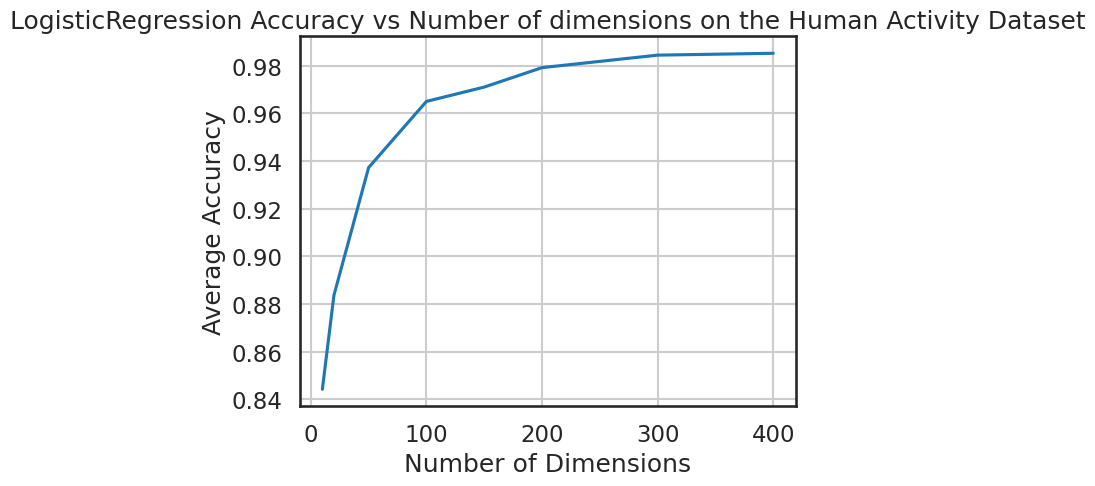

In [28]:
# Esto establece el contexto del gráfico en 'talk', lo que ajusta los parámetros visuales para adaptarse a una presentación o discusión más destacada.
sns.set_context('talk')

# Esto crea un objeto de ejes para el gráfico.
ax = plt.axes()

# Esto traza la línea en el gráfico utilizando los valores de ns en el eje x y los valores de score_list en el eje y.
x = ns
y = score_list
ax.plot(x, y)

# Esto establece las etiquetas de los ejes x e y, así como el título del gráfico.
ax.set(xlabel = 'Number of Dimensions', ylabel = 'Average Accuracy', title = 'LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')

# Esto agrega una cuadrícula al gráfico para facilitar la lectura de los valores.
ax.grid(True)